In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-data/trainset.csv
/kaggle/input/stock-data/testset.csv


In [2]:
# read the train data from datasets
data = pd.read_csv("/kaggle/input/stock-data/trainset.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


Column (Open and close): open and close indicates the starting and final price of stock for that specific day
Column (High and Low): Indicates the maximum and minimum stock price for that specific day

In [3]:
# convert date into proper format
data["Date"] = pd.to_datetime(data["Date"])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


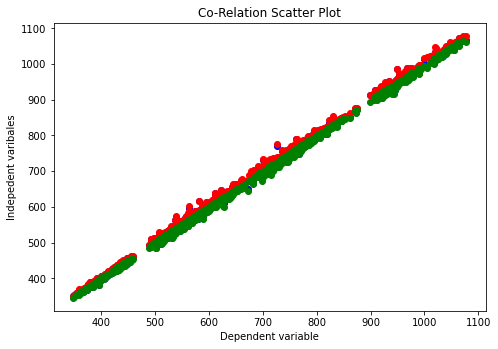

In [4]:
# close is our target variable and all othres are independent variables
# check the relationship between dependent and independent variables
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(data["Close"], data["Open"], color="blue")
ax.scatter(data["Close"], data["High"], color="red")
ax.scatter(data["Close"], data["Low"], color="green")
ax.set_xlabel("Dependent variable")
ax.set_ylabel("Indepedent varibales")
ax.set_title("Co-Relation Scatter Plot")
plt.show()

From the above graph , we can see the linear relation between target and independent variables

In [5]:
# calculate day of the week from date
data["dayofweek"] = data["Date"].dt.dayofweek
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,dayofweek
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500,2
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500,3
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800,4
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900,0
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900,1


Convert dayofweek into friday/monday then 1 and if tuesday/wensday/thursay then 0 

In [6]:
data['mon_fri'] = 0
for i in range(0,len(data)):
    if (data['dayofweek'][i] == 0 or data['dayofweek'][i] == 4):
        data['mon_fri'][i] = 1
    else:
        data['mon_fri'][i] = 0
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date,Open,High,Low,Close,Adj Close,Volume,dayofweek,mon_fri
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500,2,0
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500,3,0
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800,4,1
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900,0,1
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900,1,0


In [7]:
X = data[["Open", "High", "Low", "Adj Close", "Volume", "mon_fri"]].values
y = data["Close"].values

In [8]:
# split the data into train test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1007, 6)
X_test shape: (252, 6)
y_train shape: (1007,)
y_test shape: (252,)


In [9]:
# create model and fit the data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_hat = lr_model.predict(X_test)
print(y_hat[0:5])

[785.309998 724.890015 760.539978 548.163452 498.128784]


Use Test dataset to test the data

In [10]:
test_data = pd.read_csv("/kaggle/input/stock-data/testset.csv")
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [11]:
# convert date into dayof week
test_data["Date"] = pd.to_datetime(test_data["Date"])
test_data["dayofweek"] = test_data["Date"].dt.dayofweek

test_data['mon_fri'] = 0
for i in range(0,len(test_data)):
    if (test_data['dayofweek'][i] == 0 or test_data['dayofweek'][i] == 4):
        test_data['mon_fri'][i] = 1
    else:
        test_data['mon_fri'][i] = 0
    
test_data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Open,High,Low,Close,Adj Close,Volume,dayofweek,mon_fri
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600,1,0
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200,2,0
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600,3,0
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100,4,1
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600,0,1


In [12]:
y_testdata = test_data["Close"].values
X_testdata = test_data[["Open", "High", "Low", "Adj Close", "Volume", "mon_fri"]].values

In [13]:
# use data to predict values
y_predict = lr_model.predict(X_testdata)
print(y_predict[0:5])
print(y_testdata[0:5])

[1065.       1082.47998  1086.400024 1102.22998  1106.939941]
[1065.       1082.47998  1086.400024 1102.22998  1106.939941]


In [14]:
# calculate the accuracy of the model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_hat))
print('R²: %.2f' % r2_score(y_test, y_hat))

Mean squared error: 0.00
R²: 1.00
